# HW3- Stumphauser Nóra - LFG7OR 

Download data from http://idojarasbudapest.hu/archivalt-idojaras (I copy-paste it from the website to Excel) and load it

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [157]:
data = pd.read_excel('data.xlsx')

Creating average temperature for each day.

In [158]:
avg = []
for i in range(len(data)):
    avg.append((data['temp_max'][i]+data['temp_min'][i])/2)

In [159]:
data['avg'] = avg
data = data.drop(['temp_max', 'temp_min'], axis=1)

In [160]:
data

,avg
0,1.60
1,1.40
2,0.85
3,3.90
4,1.40
...,...
294,12.75
295,13.00
296,13.60
297,15.00


In [161]:
X = np.array(data['avg'])
X.shape

(299,)

## 1-D Conv

I used the code of lecture 7 from GitHub.

In [20]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [244]:
def make_1d_convnet(window_size, filter_length, nb_input_series=1, nb_outputs=1, nb_filter=4):
    model = Sequential()
    model.add(Conv1D(filters=nb_filter, kernel_size=filter_length, activation='relu', input_shape=(window_size, nb_input_series)))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(nb_outputs, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

In [56]:
def make_timeseries_instances(timeseries, window_size):
    timeseries = np.asarray(timeseries)
    assert 0 < window_size < timeseries.shape[0] , "Out of range 0 < {} < {} ".format(window_size,timeseries.shape[0])
    X = np.atleast_3d(np.array([timeseries[start:start + window_size] for start in range(0, timeseries.shape[0] - window_size)]))
    Y = timeseries[window_size:]
    return X, Y

Plot the data

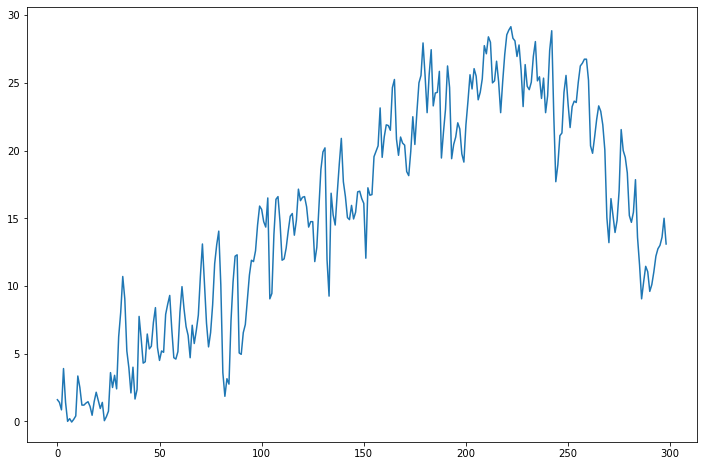

In [57]:
plt.figure(figsize=(12,8))
plt.plot(X)

Predict for the known days to see how well the neural network can learn the temperature.

In [72]:
def evaluate_timeseries(timeseries, window_size, valid_split=0.2, test_split=0.15):
    filter_length = 4
    nb_filter = 30
    timeseries = np.atleast_2d(timeseries)
    if timeseries.shape[0] == 1:
        timeseries = timeseries.T       
    nb_samples, nb_series = timeseries.shape
    model = make_1d_convnet(window_size=window_size, filter_length=filter_length, nb_input_series=nb_series, nb_outputs=nb_series, nb_filter=nb_filter)
    model.summary()
    X, Y = make_timeseries_instances(timeseries, window_size)
    
    valid_size = int(nb_samples*(1-test_split-valid_split))
    test_size = int(nb_samples*(1-test_split))
    X_train, Y_train = X[:valid_size], Y[:valid_size]
    X_valid, Y_valid = X[valid_size:test_size], Y[valid_size:test_size]
    X_test, Y_test   = X[test_size:], Y[test_size:]
    
    model.fit(X_train, Y_train, epochs=150, batch_size=16, validation_data=(X_valid, Y_valid), verbose=2)
    
    preds   = model.predict(X_test)

    return Y_test, preds

In [73]:
window_size = 5
targets, preds = evaluate_timeseries(X, window_size)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 2, 30)             150       
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 1, 30)             0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 30)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 31        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
13/13 - 0s - loss: 191.9592 - mae: 11.8037 - val_loss: 449.5827 - val_mae: 21.0798
Epoch 2/150
13/13 - 0s - loss: 119.0551 - mae: 9.2546 - val_loss: 267.2232 - val_mae: 16.1947
Epoch 3/150
13/13 - 0s - loss: 70.5467 - mae: 7.0146 - val_loss:

13/13 - 0s - loss: 5.7941 - mae: 1.8641 - val_loss: 4.2146 - val_mae: 1.6195
Epoch 83/150
13/13 - 0s - loss: 5.8403 - mae: 1.8992 - val_loss: 4.2230 - val_mae: 1.6717
Epoch 84/150
13/13 - 0s - loss: 5.7360 - mae: 1.8637 - val_loss: 4.1345 - val_mae: 1.6340
Epoch 85/150
13/13 - 0s - loss: 5.9720 - mae: 1.9141 - val_loss: 4.1515 - val_mae: 1.6563
Epoch 86/150
13/13 - 0s - loss: 5.8890 - mae: 1.8817 - val_loss: 4.1963 - val_mae: 1.6674
Epoch 87/150
13/13 - 0s - loss: 5.7566 - mae: 1.8772 - val_loss: 4.1500 - val_mae: 1.6570
Epoch 88/150
13/13 - 0s - loss: 5.7340 - mae: 1.8661 - val_loss: 4.3808 - val_mae: 1.7230
Epoch 89/150
13/13 - 0s - loss: 5.6947 - mae: 1.8612 - val_loss: 4.0990 - val_mae: 1.6404
Epoch 90/150
13/13 - 0s - loss: 5.7097 - mae: 1.8694 - val_loss: 4.1398 - val_mae: 1.6553
Epoch 91/150
13/13 - 0s - loss: 5.7660 - mae: 1.8734 - val_loss: 4.4347 - val_mae: 1.7402
Epoch 92/150
13/13 - 0s - loss: 5.6968 - mae: 1.8727 - val_loss: 4.1665 - val_mae: 1.6104
Epoch 93/150
13/13 - 0s

Plot the predictions and targets, as we can see it is good.

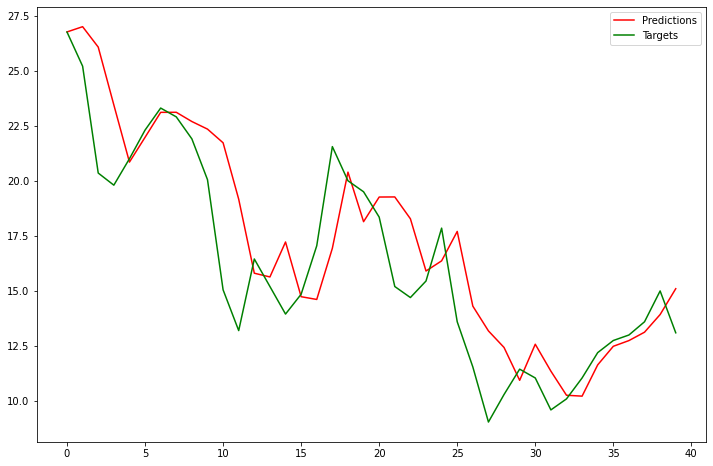

In [74]:
plt.figure(figsize=(12,8))
plt.plot(preds, color='r', label="Predictions")
plt.plot(targets, color='g', label="Targets")
plt.legend()

## Predictions

In [204]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
tf.get_logger().setLevel('ERROR') #it writes always warning, that I don't want to see

Create date list for nice output.

In [215]:
date = ['10.26','10.27','10.28','10.29', '10.30', '10.31']
for i in range(1,31):
    date.append('11.'+str(i))
print(len(date))

36


In every step the neural network give prediction for the next day, we put this prediction into the data, and do it over and over again for every day.

In [262]:
lists = []
for i in range(1):
    lists.append(0)
df2 = pd.DataFrame({"avg":lists})
data_prediction = data
data_prediction = data_prediction.append(df2, ignore_index = True)  #put one 0 to the end of the dataframe, we want to predict for one day

X_predict = np.array(data_prediction['avg']) #create the numpy array from data
X_pred_max = np.max(X_predict)
X_pred_min = np.min(X_predict)
X_predict = (X_predict-X_pred_min) /(X_pred_max-X_pred_min)
window_size = 5
pred_list = []



for i in range(36): #we want to predict in total for 36 days
    def evaluate_timeseries(timeseries, window_size, valid_split=0.2, test_split=0.15):
        filter_length = 4
        nb_filter = 20
        timeseries = np.atleast_2d(timeseries)
        if timeseries.shape[0] == 1:
            timeseries = timeseries.T       
        nb_samples, nb_series = timeseries.shape
        model = make_1d_convnet(window_size=window_size, filter_length=filter_length, nb_input_series=nb_series, nb_outputs=nb_series, nb_filter=nb_filter)
        X, Y = make_timeseries_instances(timeseries, window_size)

        X_train, Y_train = X[:280+i], Y[:280+i] #we shift the test set every step
        X_test, Y_test   = X[280+i:], Y[280+i:]

        model.fit(X_train, Y_train, epochs=200, batch_size=16, verbose=0)

        preds   = model.predict(X_test)
        return Y_test, preds
    
    targets, preds = evaluate_timeseries(X_predict, window_size) #create prediction
    data_prediction = data
    print(date[i], ': ', (preds[-1][0])*(X_pred_max-X_pred_min)+X_pred_min) #print out the prediction
    pred_list.append((preds[-1][0])*(X_pred_max-X_pred_min)+X_pred_min) #pred_list contains all the predictions
    df3 = pd.DataFrame({"avg":pred_list})
    data_prediction = data_prediction.append(df3, ignore_index = True) #we put the pred_list to the raw data with a new 0 element
    lists = [0]
    df2 = pd.DataFrame({"avg":lists})
    data_prediction = data_prediction.append(df2, ignore_index = True)
    X_predict = np.array(data_prediction['avg'])
    X_pred_max = np.max(X_predict)
    X_pred_min = np.min(X_predict)
    X_predict = (X_predict-X_pred_min) /(X_pred_max-X_pred_min)
    
    
 


10.26 :  13.84481611251831
10.27 :  13.612336492538452
10.28 :  15.260466170310973
10.29 :  14.197078239917754
10.30 :  14.210457122325897
10.31 :  14.594721007347106
11.1 :  15.545982694625854
11.2 :  15.836231517791747
11.3 :  16.093909454345702
11.4 :  15.658028006553648
11.5 :  15.513112449645995
11.6 :  15.192537927627562
11.7 :  16.645928025245667
11.8 :  16.284381437301633
11.9 :  16.812813353538512
11.10 :  17.12536959648132
11.11 :  17.67905030250549
11.12 :  17.52144682407379
11.13 :  18.04060559272766
11.14 :  18.232755374908447
11.15 :  18.444337344169615


KeyboardInterrupt: 

As we can see the predictions not good, because it is almost impossible to have 15 celsius mean temperature in the middle of November. Maybe it is because of the last time, when temperature is rising now, and it don't have data from last years.

# For 28 Oct it predicts: 13.41

# For 3 Nov it predicts: 14.5

# For 24 Nov it predicts 14.9